<a href="https://colab.research.google.com/github/subho99/Computational-Data-Science/blob/main/SubhajitBasistha_M5_AST_05_ETL_Operations_PySpark_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 5: ETL concepts and pipeline

## Learning Objectives

At the end of the experiment, you will be able to:

* use Spark’s built-in and external data sources to read, refine, and write data in different file formats as part of the extract, transform, and load (ETL) tasks
* perform complex data exploration and analysis using Spark SQL

### Introduction

ETL (Extract, Transform, and Load) is the procedure of migrating data from one system to another.
* Data **extraction** is the process of retrieving data out of homogeneous or heterogeneous sources for further data processing and data storage.
* During data **transformation**, the data is cleaned and incorrect or inaccurate records are modified or deleted.
* Finally, the processed data is **loaded** (or stored) into a target system such as a data warehouse or NoSQL database or RDBMS.

Data engineers use Spark because it provides a simple way to parallelize computations and hides all the complexity of distribution and fault tolerance. This leaves them free to focus on using high-level DataFrame-based APIs and domain-specific language queries to do ETL, reading and combining data from multiple sources.

Here we will consider tabular data to do ETL operations. Starting from data extraction, we will perform various transformations and try to gain some insights from it and then load it to a NoSQL database or store it in different file formats.

### Dataset

The dataset chosen for this assignment is [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). The dataset is made up of 1197 records and 15 columns. It includes important attributes of the garment manufacturing process and the productivity of the employees. The dataset contains records of three months (Jan to Mar 2015) with 2 distinct departments, 12 unique team numbers and 5 different quarters. Some of the features are listed below:

* date: Date in MM-DD-YYYY
* day: Day of the Week
* quarter: A portion of the month. A month was divided into four quarters
* department: Associated department with the instance
* team: Associated team number with the instance
* no_of_workers: Number of workers in each team
* no_of_style_change: Number of changes in the style of a particular product
* targeted_productivity: Targeted productivity set by the Authority for each team for each day.
* smv: Standard Minute Value, it is the allocated time for a task
* wip: Work in progress. Includes the number of unfinished items for products
* overtime: Represents the amount of overtime by each team in minutes
* incentive: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
* idletime: The amount of time when the production was interrupted due to several reasons
* idlemen: The number of workers who were idle due to production interruption
* actual_productivity: The actual % of productivity that was delivered by the workers. It ranges from 0-1.

Date, quarter, department, and day are object datatypes and the rest are int or float types.

To know more about the dataset click [here](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees).

### Setup Steps:

In [63]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236624" #@param {type:"string"}

In [2]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "8240187807" #@param {type:"string"}

In [64]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M5_AST_05_ETL_Operations_PySpark_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/CDS/Datasets/garments_worker_productivity.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Install Pyspark

In [4]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285388 sha256=bed3ed8a7fafe580b1be34fd05a52295932007bce1df2e379a0ff0e4842ef335
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


### Import required packages

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

### Start a Spark Session

Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0. Instead of having various context, everything is now encapsulated in a **Spark session**.

In [6]:
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ETL').getOrCreate()
spark

### Tabular Data Analytics

#### Extract data into PySpark
To load the dataset we will use the read.csv module.  The inferSchema parameter provided will enable Spark to automatically determine the data type for each column.

In [9]:
df = spark.read.csv('garments_worker_productivity.csv', header=True, inferSchema= True)

#### Transforming Data

* Display first few rows of the data

In [10]:
df.show(5)

+--------+--------+----------+--------+----+---------------------+-----+----+---------+---------+---------+--------+------------------+-------------+-------------------+
|    date| quarter|department|     day|team|targeted_productivity|  smv| wip|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|
+--------+--------+----------+--------+----+---------------------+-----+----+---------+---------+---------+--------+------------------+-------------+-------------------+
|1/1/2015|Quarter1|    sweing|Thursday|   8|                  0.8|26.16|1108|     7080|       98|      0.0|       0|                 0|         59.0|        0.940725424|
|1/1/2015|Quarter1|finishing |Thursday|   1|                 0.75| 3.94|null|      960|        0|      0.0|       0|                 0|          8.0|             0.8865|
|1/1/2015|Quarter1|    sweing|Thursday|  11|                  0.8|11.41| 968|     3660|       50|      0.0|       0|                 0|         30.5| 

In the above output, the wip (work in progress) column contains null values. We need to check for other columns as well.
* Display total number of rows

In [11]:
df.count()

1197

* Check for Null values in each column

In [12]:
df.select([(count(when(isnan(c) | col(c).isNull(), c))/1197).alias(c) for c in df.columns]).show()

+----+-------+----------+---+----+---------------------+---+------------------+---------+---------+---------+--------+------------------+-------------+-------------------+
|date|quarter|department|day|team|targeted_productivity|smv|               wip|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|
+----+-------+----------+---+----+---------------------+---+------------------+---------+---------+---------+--------+------------------+-------------+-------------------+
| 0.0|    0.0|       0.0|0.0| 0.0|                  0.0|0.0|0.4227234753550543|      0.0|      0.0|      0.0|     0.0|               0.0|          0.0|                0.0|
+----+-------+----------+---+----+---------------------+---+------------------+---------+---------+---------+--------+------------------+-------------+-------------------+



The wip column contains around 42% null values so we can drop that column.
* Drop the wip column having Null values

In [13]:
df1 = df.drop('wip')

In [14]:
# Recheck for null values
df1.select([(count(when(isnan(c) | col(c).isNull(), c))/1197).alias(c) for c in df1.columns]).show()

+----+-------+----------+---+----+---------------------+---+---------+---------+---------+--------+------------------+-------------+-------------------+
|date|quarter|department|day|team|targeted_productivity|smv|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|
+----+-------+----------+---+----+---------------------+---+---------+---------+---------+--------+------------------+-------------+-------------------+
| 0.0|    0.0|       0.0|0.0| 0.0|                  0.0|0.0|      0.0|      0.0|      0.0|     0.0|               0.0|          0.0|                0.0|
+----+-------+----------+---+----+---------------------+---+---------+---------+---------+--------+------------------+-------------+-------------------+



Let's see the distinct values in department column.
* Display distinct `department` from dataframe

In [15]:
# Display count of distinct 'department'
df1.select('department').distinct().count()

3

In [16]:
# Display distinct values for 'department' column
df1.select('department').distinct().show()

+----------+
|department|
+----------+
|    sweing|
| finishing|
|finishing |
+----------+



There is ambiguity in distinct department values and it needs to be taken care of.
* Transform department column

In [17]:
# Removing trailing spaces from both sides using department column
df2 = df1.withColumn('department', trim(col('department')))

In [18]:
# Display distinct values for 'department' column
df2.select('department').distinct().show()

+----------+
|department|
+----------+
|    sweing|
| finishing|
+----------+



In [19]:
# Replacing department value from 'sweing' to 'sewing'
df3 = df2.withColumn('department', regexp_replace(col('department'), 'sweing', 'sewing'))

In [20]:
# Display distinct values for 'department' column
df3.select('department').distinct().show()

+----------+
|department|
+----------+
|    sewing|
| finishing|
+----------+



* Check for duplicate values in data

In [21]:
cols = df3.columns
if df3.count() > df3.dropDuplicates(cols).count():
    print('Data has duplicates')
else:
  print('Data has no duplicates')

Data has no duplicates


If data has duplicate values, run the below cell by uncommenting it

In [22]:
df3 = df3.dropDuplicates(df3.columns)

After removing duplicates, let's take a look at the datatypes of our columns.
* Display data types of dataframe columns

In [23]:
# Print the data types
df3.dtypes

[('date', 'string'),
 ('quarter', 'string'),
 ('department', 'string'),
 ('day', 'string'),
 ('team', 'int'),
 ('targeted_productivity', 'double'),
 ('smv', 'double'),
 ('over_time', 'int'),
 ('incentive', 'int'),
 ('idle_time', 'double'),
 ('idle_men', 'int'),
 ('no_of_style_change', 'int'),
 ('no_of_workers', 'double'),
 ('actual_productivity', 'double')]

Here, the 'date' column has a string datatype. In order to perform analytics involving year and month, we need to convert it into timestamp datatype.
* Transform the `date` column from string type to Spark `timestamp` data type

In [24]:
df4 = df3.withColumn("date", to_timestamp(col("date"), "M/d/yyyy"))

In [25]:
df4.dtypes

[('date', 'timestamp'),
 ('quarter', 'string'),
 ('department', 'string'),
 ('day', 'string'),
 ('team', 'int'),
 ('targeted_productivity', 'double'),
 ('smv', 'double'),
 ('over_time', 'int'),
 ('incentive', 'int'),
 ('idle_time', 'double'),
 ('idle_men', 'int'),
 ('no_of_style_change', 'int'),
 ('no_of_workers', 'double'),
 ('actual_productivity', 'double')]

Now we can use the `year()` SQL Spark function on the Timestamp column data type `date`.
* Display how many distinct years of data is in the dataset

In [26]:
df4.select(year('date')).distinct().orderBy(year('date')).show()

+----------+
|year(date)|
+----------+
|      2015|
+----------+



We see that all the records are from the year 2015.

Similar to year() we can use the `month()` SQL Spark function on the Timestamp datatype column `date`.
* Display how many distinct months of data is in the dataset

In [27]:
df4.select(month('date')).distinct().orderBy(month('date')).show()

+-----------+
|month(date)|
+-----------+
|          1|
|          2|
|          3|
+-----------+



We see that the data was collected in the months January to March.

* Check in which month the productivity was maximum

+-----------+------------------------+
|month(date)|avg(actual_productivity)|
+-----------+------------------------+
|          1|      0.7554150713210335|
|          3|       0.718952764127359|
|          2|      0.7179482808871324|
+-----------+------------------------+



<Axes: xlabel='month(date)', ylabel='avg(actual_productivity)'>

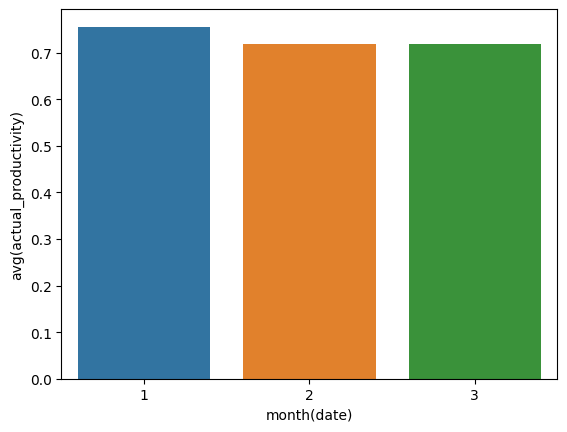

In [28]:
df_d = df4.groupby(month('date')).avg().select(['month(date)', 'avg(actual_productivity)'])
df_d.show()
sns.barplot(x = df_d.toPandas()['month(date)'], y= df_d.toPandas()['avg(actual_productivity)'])

From the above plot, it can be seen that in January the productivity was little higher than remaining two.

Let's gain few more insights from the data
* Display the incentives paid to different teams

+----+------------------+
|team|    avg(incentive)|
+----+------------------+
|  12|  41.2020202020202|
|   1|              46.6|
|   6| 22.70212765957447|
|   3| 49.55789473684211|
|   5| 49.13978494623656|
|   9| 60.93269230769231|
|   4| 35.04761904761905|
|   8|24.880733944954127|
|   7|          15.53125|
|  10|             36.33|
|  11| 37.90909090909091|
|   2|38.211009174311926|
+----+------------------+



<Axes: xlabel='team', ylabel='avg(incentive)'>

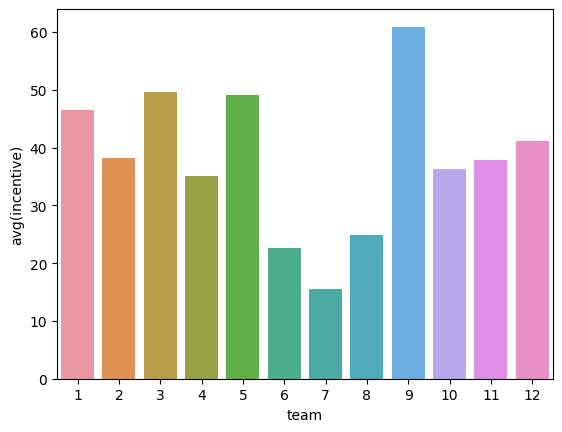

In [29]:
df_i = df4.groupby('team').avg().select(['team', 'avg(incentive)'])
df_i.show()
sns.barplot(x = df_i.toPandas()['team'], y= df_i.toPandas()['avg(incentive)'])

So on average team 9 received the highest incentive.
* Display number of workers in each Team

+----+------------------+
|team|sum(no_of_workers)|
+----+------------------+
|  12|            2368.0|
|   1|            3679.5|
|   6|            2366.0|
|   3|            3754.5|
|   5|            3662.5|
|   9|            3662.0|
|   4|            4011.0|
|   8|            3650.5|
|   7|            3561.5|
|  10|            3529.5|
|  11|            3409.0|
|   2|            3774.0|
+----+------------------+



<Axes: xlabel='team', ylabel='sum(no_of_workers)'>

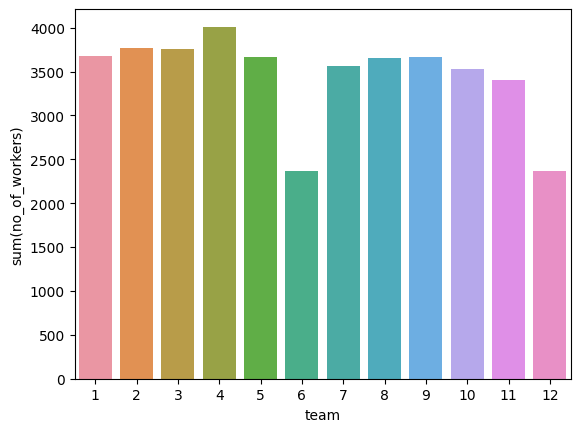

In [30]:
df_w = df4.groupby('team').sum().select(['team', 'sum(no_of_workers)'])
df_w.show()
sns.barplot(x = df_w.toPandas()['team'], y= df_w.toPandas()['sum(no_of_workers)'])

From the above plot, it can be seen that team 6 and 12 have less number of workers compared to other teams.

Let's find out how much it costs for the first quarter of the first month.
* Display the `incentive` paid for the first quarter of the first month

In [31]:
df_q = df4.select(month("date"), "quarter", "incentive").where((col('month(date)') == 1) & (col("quarter") == "Quarter1"))
df_q.show(5)
df_q.groupby('quarter').sum().select('sum(incentive)').show()

+-----------+--------+---------+
|month(date)| quarter|incentive|
+-----------+--------+---------+
|          1|Quarter1|       38|
|          1|Quarter1|       50|
|          1|Quarter1|       50|
|          1|Quarter1|        0|
|          1|Quarter1|       40|
+-----------+--------+---------+
only showing top 5 rows

+--------------+
|sum(incentive)|
+--------------+
|          3525|
+--------------+



Before fitting to a model, the outlier removal and feature scaling of data are important.
* Check for outliers

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


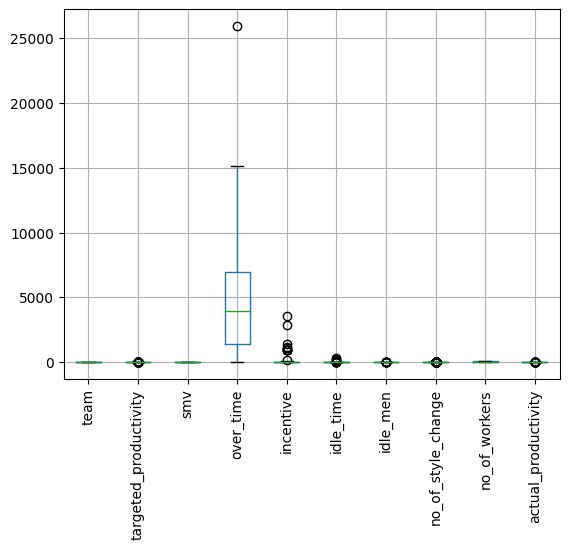

In [32]:
df4.toPandas().boxplot()
plt.xticks(rotation= 90)
plt.show()

* Handling outliers

Here instead of removing the outliers we will change their values to upper bound and lower bound depending on whether the value is higher than upper bound or lower than lower bound respectively.

In [33]:
df5 = df4
outlier_cols = ["targeted_productivity", "smv", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "actual_productivity"] # Columns with outliers
def handle_outliers(df, colm):
    df = df.toPandas()
    q1 = df.describe()[colm].loc["25%"]
    q3 = df.describe()[colm].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(len(df)):
      if df.loc[i,colm] > upper_bound:
        df.loc[i,colm]= upper_bound
      if df.loc[i,colm] < lower_bound:
        df.loc[i,colm]= lower_bound
    return spark.createDataFrame(df)

for colm in outlier_cols:
    df5 = handle_outliers(df5, colm)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  se

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


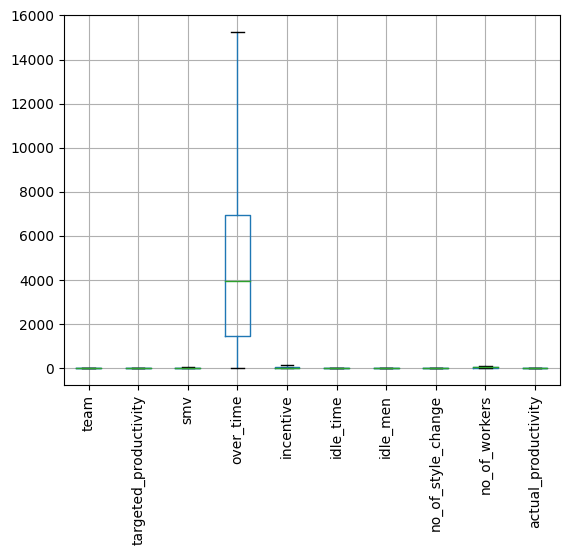

In [34]:
# Recheck for outliers
df5.toPandas().boxplot()
plt.xticks(rotation= 90)
plt.show()

* Scaling features

In [35]:
# Display the statistics of dataframe
df5.toPandas().describe()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.0,1197.0,1197.0,1197.000000,1197.000000
mean,6.426901,0.736842,15.062172,4558.538012,26.712615,0.0,0.0,0.0,34.609858,0.737397
std,3.463963,0.075515,10.943219,3305.837733,31.563351,0.0,0.0,0.0,22.197687,0.168772
min,1.000000,0.550000,2.900000,0.000000,0.000000,0.0,0.0,0.0,2.000000,0.350389
25%,3.000000,0.700000,3.940000,1440.000000,0.000000,0.0,0.0,0.0,9.000000,0.650307
50%,6.000000,0.750000,15.260000,3960.000000,0.000000,0.0,0.0,0.0,34.000000,0.773333
75%,9.000000,0.800000,24.260000,6960.000000,50.000000,0.0,0.0,0.0,57.000000,0.850253
max,12.000000,0.800000,54.560000,15240.000000,125.000000,0.0,0.0,0.0,89.000000,1.120437


In [36]:
# Specify columns that need to be scaled
columns = ["smv", "over_time", "incentive", "no_of_workers"]

In [37]:
print("Before Scaling :")
df5.show(5)
df6 = df5

from pyspark.ml.feature import MinMaxScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import udf, round
from pyspark.sql.types import DoubleType

# UDF for converting column type from vector to double type
unlist = udf(lambda x: float(list(x)[0]), DoubleType())
spark.udf.register("unlist", unlist)

# Iterating over columns to be scaled
for i in columns:
    # VectorAssembler Transformation - Converting column to vector type
    assembler = VectorAssembler(inputCols=[i],outputCol=i+"_Vect")

    # MinMaxScaler Transformation
    scaler = MinMaxScaler(inputCol=i+"_Vect", outputCol=i+"_Scaled")

    # Pipeline of VectorAssembler and MinMaxScaler
    pipeline = Pipeline(stages=[assembler, scaler])

    # Fitting pipeline on dataframe
    df6 = pipeline.fit(df6).transform(df6).withColumn(i+"_Scaled", unlist(i+"_Scaled")).drop(i+"_Vect")

print("After Scaling :")
df6.show(5)

Before Scaling :
+-------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+
|               date| quarter|department|     day|team|targeted_productivity|  smv|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|
+-------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+
|2015-01-08 00:00:00|Quarter2|    sewing|Thursday|  12|                  0.8|11.61|    15120|       63|      0.0|       0|                 0|         31.5|        0.800107143|
|2015-01-10 00:00:00|Quarter2| finishing|Saturday|   7|                  0.8|  2.9|     1440|        0|      0.0|       0|                 0|          8.0|        0.670075758|
|2015-01-12 00:00:00|Quarter2| finishing|  Monday|   8|                  0.8|  2.9|     1440|        0|

Let's create a new `id` column that will contain a unique value for each record.

In [38]:
df7 = df6.withColumn("id", monotonically_increasing_id()+1)
df7.select('id').show(5)

+---+
| id|
+---+
|  1|
|  2|
|  3|
|  4|
|  5|
+---+
only showing top 5 rows



We can also perform SQL queries on spark dataframe using the `spark.sql()` function. But for that, we first need to register the dataframe as a table in the spark catalog. We can do this using the `createOrReplaceTempView()` spark dataframe method. It takes the name of the temporary table we'd like to register as argument. As this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark dataframe.

In [39]:
df7.createOrReplaceTempView('df_table')
spark.sql("select date, department, team, smv, over_time, incentive from df_table where department='sewing'").show(5)

+-------------------+----------+----+-----+---------+---------+
|               date|department|team|  smv|over_time|incentive|
+-------------------+----------+----+-----+---------+---------+
|2015-01-08 00:00:00|    sewing|  12|11.61|    15120|       63|
|2015-02-02 00:00:00|    sewing|   4|22.52|     5940|       50|
|2015-02-19 00:00:00|    sewing|  11|11.41|     3480|       30|
|2015-02-26 00:00:00|    sewing|   5|27.48|     6840|       38|
|2015-01-10 00:00:00|    sewing|   1|26.16|    10620|       63|
+-------------------+----------+----+-----+---------+---------+
only showing top 5 rows



#### Load Data

Once we have extracted and transformed our data, we might want to load it into the destination or store it somewhere. We will load it into the MongoDB database.

Data in MongoDB is represented and stored using JSON-style documents. In PyMongo we use dictionaries to represent documents.

In [40]:
data = df7.toPandas()
documents = []
for i in range(len(data)):
        doc = data.iloc[i,:].to_dict()
        for keys in doc:
          if keys != 'date':
            if type(doc[keys]) not in [str]:
                doc[keys] = float(doc[keys])
        documents.append(doc)
documents[0:1]

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


[{'date': Timestamp('2015-01-08 00:00:00'),
  'quarter': 'Quarter2',
  'department': 'sewing',
  'day': 'Thursday',
  'team': 12.0,
  'targeted_productivity': 0.8,
  'smv': 11.61,
  'over_time': 15120.0,
  'incentive': 63.0,
  'idle_time': 0.0,
  'idle_men': 0.0,
  'no_of_style_change': 0.0,
  'no_of_workers': 31.5,
  'actual_productivity': 0.800107143,
  'smv_Scaled': 0.16860240030971735,
  'over_time_Scaled': 0.9921259842519685,
  'incentive_Scaled': 0.504,
  'no_of_workers_Scaled': 0.3390804597701149,
  'id': 1.0}]

If you would like to perform the data insertion step then please **create your own account** on MongoDB Atlas as given in the reference [here](https://cdn.iisc.talentsprint.com/CDS/DB_Connect_Docs/Assignment_MongoDB_Connect.pdf) and change the credentials and run the below code by uncommenting it.

In [41]:
### new_document = coll.insert_many(documents)

Also, we can store the data in other formats like json, csv, and parquet and read it back whenever required.

**Store the dataframe as a `json file`**

In [42]:
df7.write.format("json").mode("overwrite").save('transformed_json_data.json')

**Read data from `json` to spark dataframe**

In [43]:
df_json = spark.read.format("json").load('transformed_json_data.json')

In [44]:
df_json.show(5)

+-------------------+--------------------+--------+----------+----------+--------+---------+---------+----------------+------------------+-------------+--------------------+---------+-------------------+--------+-----+--------------------+---------------------+----+
|actual_productivity|                date|     day|department|        id|idle_men|idle_time|incentive|incentive_Scaled|no_of_style_change|no_of_workers|no_of_workers_Scaled|over_time|   over_time_Scaled| quarter|  smv|          smv_Scaled|targeted_productivity|team|
+-------------------+--------------------+--------+----------+----------+--------+---------+---------+----------------+------------------+-------------+--------------------+---------+-------------------+--------+-----+--------------------+---------------------+----+
|         0.37046657|2015-01-27T00:00:...| Tuesday|    sewing|8589934593|       0|      0.0|       23|           0.184|                 0|         54.0|  0.5977011494252873|     6480| 0.4251968503937

**Store the dataframe as a `csv file`**

In [45]:
df7.write.format("csv").mode("overwrite").option("header", "true").save("transformed_csv_data.csv")

**Read data from `csv` to spark dataframe**

In [46]:
df_csv = spark.read.format("csv").option("header", "true").load('transformed_csv_data.csv')

In [47]:
df_csv.show(5)

+--------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+--------------------+-------------------+----------------+--------------------+----------+
|                date| quarter|department|     day|team|targeted_productivity|  smv|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|          smv_Scaled|   over_time_Scaled|incentive_Scaled|no_of_workers_Scaled|        id|
+--------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+--------------------+-------------------+----------------+--------------------+----------+
|2015-01-27T00:00:...|Quarter4|    sewing| Tuesday|  11|   0.5499999999999998|48.18|     6480|       23|      0.0|       0|                 0|         54.0|         0.37046657|  0.8765001935733643| 0

**Use Parquet files to store data**

Parquet uses snappy compression to compress the data. If the DataFrame is written as Parquet, the schema is preserved as part of the Parquet metadata.

To know more about parquet file format click [here](https://ellicium.com/blog/parquet-file-format-structure/#:~:text=At%20a%20high%20level%2C%20the,stored%20in%20the%20footer%20section.).

In [48]:
df7.write.format("parquet").mode("overwrite").save("transformed_parquet_data")

**Read data from Parquet file**

We don't have to specify the schema here since it's stored as part of the Parquet metadata.

In [49]:
df_parquet = spark.read.format("parquet").load("transformed_parquet_data")

In [53]:
from pyspark.sql.functions import date_format

# SQL query to determine the team with the highest average incentive on Mondays
query = """
SELECT team, AVG(incentive) as avg_incentive
FROM df_table
WHERE date_format(date, 'E') = 'Mon'
GROUP BY team
ORDER BY avg_incentive DESC
LIMIT 1
"""

# Execute the SQL query
highest_avg_incentive_team = spark.sql(query)
highest_avg_incentive_team.show()

+----+-------------+
|team|avg_incentive|
+----+-------------+
|   1|      48.6875|
+----+-------------+



In [50]:
df_parquet.show(5)

+-------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+--------------------+-------------------+----------------+--------------------+----------+
|               date| quarter|department|     day|team|targeted_productivity|  smv|over_time|incentive|idle_time|idle_men|no_of_style_change|no_of_workers|actual_productivity|          smv_Scaled|   over_time_Scaled|incentive_Scaled|no_of_workers_Scaled|        id|
+-------------------+--------+----------+--------+----+---------------------+-----+---------+---------+---------+--------+------------------+-------------+-------------------+--------------------+-------------------+----------------+--------------------+----------+
|2015-01-27 00:00:00|Quarter4|    sewing| Tuesday|  11|   0.5499999999999998|48.18|     6480|       23|      0.0|       0|                 0|         54.0|         0.37046657|  0.8765001935733643| 0.425

### Please answer the questions below to complete the experiment:




In [54]:
# @title Considering the scaled Spark dataframe (df7), which of the following teams has received the highest average incentive among those who worked on Monday? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "1" #@param ["","1","6","11"]

In [55]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [56]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "perfect for practice" #@param {type:"string"}


In [57]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [58]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [59]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [65]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 6415
Date of submission:  12 Aug 2023
Time of submission:  18:56:11
View your submissions: https://cds.iisc.talentsprint.com/notebook_submissions
